# Would you like to something to drink like wine?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [14]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca2 = PCA(n_components=4)

In [15]:
wine_pca = pca.fit_transform(wine_std)
wine_pca2 = pca2.fit_transform(wine_std)

In [13]:
# PCA 2차원 데이터로 분류(96% 재현율 pca데이터 쓸만함)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca, wine.target, stratify=wine.target, random_state=2021, test_size=0.25
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9111111111111111

In [16]:
# PCA 4차원 데이터로 분류(96% 재현율 pca데이터 쓸만함)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2021, test_size=0.25
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9333333333333333

### PCA 2차원 시각화

In [21]:
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [18]:
df = pd.DataFrame(wine_pca, columns= ['PC1','PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


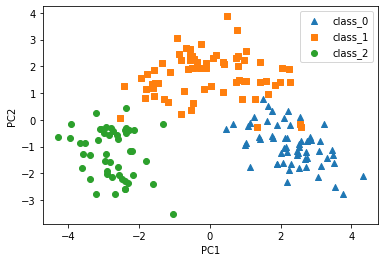

In [19]:
markers = ['^','s','o'] #setosa-세모, versicolor-네모, virginica-원

for i, marker in enumerate(markers):
    x_axis_data = df[df.target ==i]['PC1']
    y_axis_data = df[df.target ==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])
plt.legend()
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()